In [3]:
!pip install tensorflow

In [4]:

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import requests
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline
'''import urllib.request
import urllib.error'''

'import urllib.request\nimport urllib.error'

In [5]:
df=pd.read_csv('medical_records.csv')

In [4]:
'''
#df = pd.read_csv('medical_records.csv')
import os
download_dir="./Dataset/"
download_url=r"E:\prerna-DHI_webwar\Main-project\Notebook\Dataset"
os.makedirs(download_dir,exist_ok=True)
filename=os.path.basename(download_url)
download_file_path=os.path.join(download_dir,filename)
print(filename)
print(download_file_path)'''

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 126-127: malformed \N character escape (2261230496.py, line 10)

In [6]:
df.head()

,patient_id,name,date_of_birth,gender,medical_conditions,medications,allergies,last_appointment_date
0,1,Scott Webb,1967-04-28,F,"Mrs, story, security","example, parent, city","each, product, two",2022-07-26
1,2,Rachel Frederick,1977-04-04,M,"performance, participant, surface","be, develop, guy","north, hospital, international",2023-02-14
2,3,Eric Kline,1926-05-18,F,"quite, about, international","station, situation, popular","tree, other, at",2021-04-24
3,4,James Rodriguez,1954-07-20,M,"him, sea, television","about, item, often","discuss, play, somebody",2022-05-26
4,5,David Scott,2015-12-07,M,"make, moment, physical","deep, letter, difference","because, true, blood",2021-05-17


In [7]:
df.shape

(100000, 8)

In [8]:
df.describe()

,patient_id
count,100000.000000
mean,50000.500000
std,28867.657797
min,1.000000
25%,25000.750000
50%,50000.500000
75%,75000.250000
max,100000.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   patient_id             100000 non-null  int64 
 1   name                   100000 non-null  object
 2   date_of_birth          100000 non-null  object
 3   gender                 100000 non-null  object
 4   medical_conditions     100000 non-null  object
 5   medications            100000 non-null  object
 6   allergies              100000 non-null  object
 7   last_appointment_date  100000 non-null  object
dtypes: int64(1), object(7)
memory usage: 6.1+ MB


In [10]:
print(df['patient_id'].dtype!='o')
print(df['name'].dtype!='o')

True
True


In [11]:
numerical_features=[features for features in df.columns if df[features].dtype!='o']
categorical_features=[features for features in df.columns if df[features].dtype=='o']
print('we have {} numerical features: {}'.format(len(numerical_features),numerical_features))
print('we have {} categorical features : {}'.format(len(categorical_features),categorical_features))

we have 8 numerical features: ['patient_id', 'name', 'date_of_birth', 'gender', 'medical_conditions', 'medications', 'allergies', 'last_appointment_date']
we have 0 categorical features : []


In [ ]:
for column in categorical_features:
    print(df[column].value_counts(normalize=True)*100)
    print('success')

In [ ]:
for column in numerical_features:
    print(df[column].value_counts(normalize=True)*100)
    print('success')

1         0.001
66651     0.001
66673     0.001
66672     0.001
66671     0.001
          ...  
33332     0.001
33331     0.001
33330     0.001
33329     0.001
100000    0.001
Name: patient_id, Length: 100000, dtype: float64
success
Michael Smith      0.048
David Smith        0.042
John Smith         0.037
Michael Johnson    0.037
Jennifer Smith     0.033
                   ...  
Brad Knight        0.001
Shelby Ware        0.001
Mr. Eric Smith     0.001
Jesse Page         0.001
Benjamin Lowery    0.001
Name: name, Length: 71073, dtype: float64
success
1999-10-26    0.011
2012-08-12    0.011
2014-08-29    0.010
1934-02-02    0.010
1970-09-01    0.010
              ...  
1963-10-13    0.001
1980-02-16    0.001
1958-06-01    0.001
1989-03-09    0.001
1994-10-11    0.001
Name: date_of_birth, Length: 34135, dtype: float64
success
M    50.208
F    49.792
Name: gender, dtype: float64
success
should, across, threat          0.002
man, prove, make                0.002
account, second, yes      

In [ ]:
#plt.figure(figsize=(15,15))
#plt.suptitle('unvariant', fontsize=20, fontweight='bold',alpha=0.8,y=1)
#for i in range(0,len(numerical_features)):
 #   plt.subplot(5,3,i+1)
  #  sns.kdeplot(x=df[numerical_features[i]],shade=True,color='b')
   # plt.xlabel(numerical_features[i])
    #plt.tight_layout()

<Axes: >

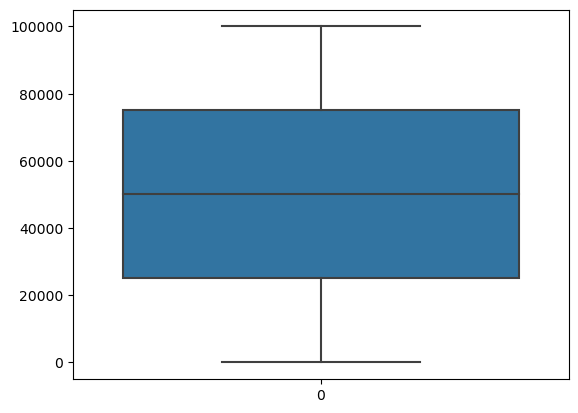

In [ ]:
sns.boxplot(df['patient_id'])

In [ ]:
#df[(list(df.Column)[1:])].corr()
df.corr()

,patient_id
patient_id,1.0


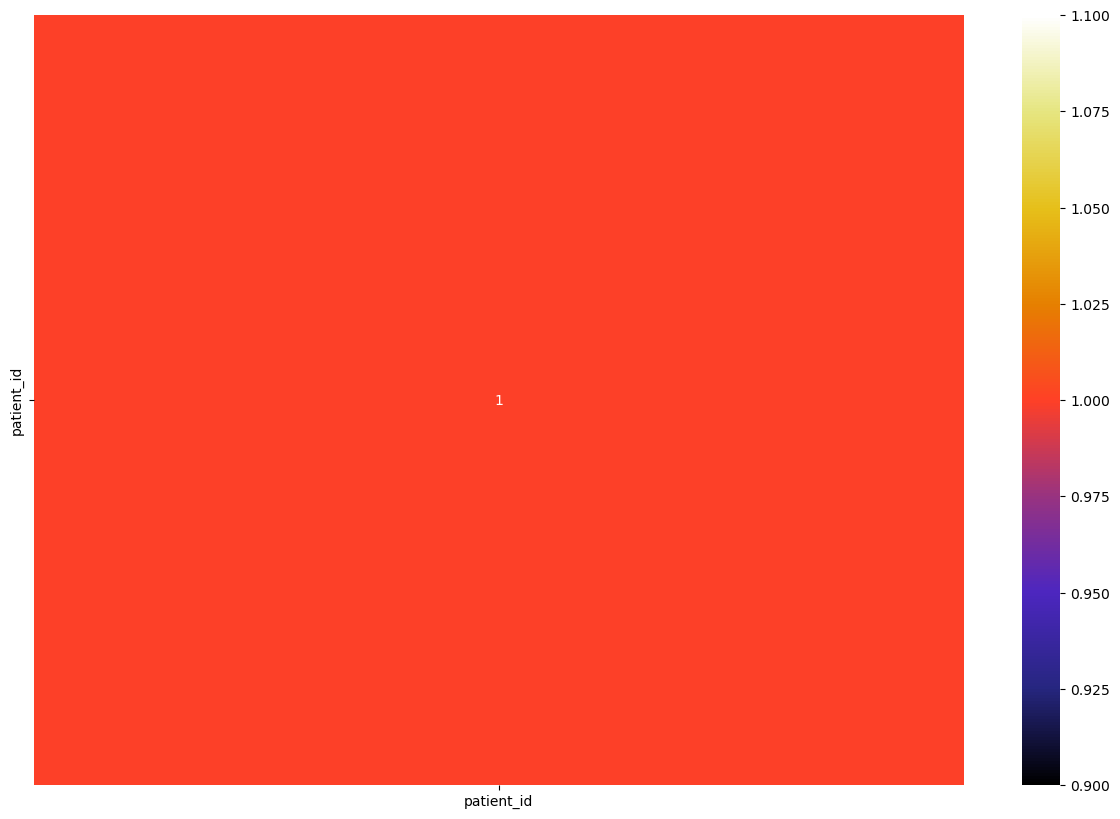

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap="CMRmap",annot=True)
plt.show()